### 회귀 평가지표

In [1]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

true = np.array([1,2,3,2,3,5,4,6,5,6,7,8,8])
preds = np.array([1,1,2,2,3,4,4,5,5,7,7,6,8])

MAE = mean_absolute_error(true, preds)
MSE = mean_squared_error(true, preds)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true, preds)
RMSLE = np.sqrt(mean_squared_log_error(true, preds))
R2 = r2_score(true, preds)

print(f'MAE:\t {MAE:.4f}')
print(f'MSE:\t {MSE:.4f}')
print(f'RMSE:\t {RMSE:.4f}')
print(f'MSLE:\t {MSLE:.4f}')
print(f'RMSLE:\t {RMSLE:.4f}')
print(f'R2:\t {R2:.4f}')


MAE:	 0.5385
MSE:	 0.6923
RMSE:	 0.8321
MSLE:	 0.0296
RMSLE:	 0.1721
R2:	 0.8617


### 레이블 인코딩(label encoding)

In [2]:
from sklearn.preprocessing import LabelEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리','바나나','바나나','사과']

label_encoder = LabelEncoder()
fruits_label_encoded = label_encoder.fit_transform(fruits)

print('레이블 인코딩 적용 후 데이터:', fruits_label_encoded)

레이블 인코딩 적용 후 데이터: [3 2 1 0 2 1 1 3]


### 원 핫 인코딩(one hot encoding)

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fruits = ['사과', '블루베리', '바나나', '귤', '블루베리','바나나','바나나','사과']

label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder()

fruits_label_encoded = label_encoder.fit_transform(fruits)
fruits_onehot_encoded = onehot_encoder.fit_transform(fruits_label_encoded.reshape(-1,1))

print("원-핫 인코딩 적용 후 데이터:\n", fruits_onehot_encoded.toarray())

원-핫 인코딩 적용 후 데이터:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


### min-max 정규화

In [4]:
import pandas as pd

height_weight_dict = {'키': [1.7, 1.5, 1.8], '몸무게': [75, 55, 60]}
df = pd.DataFrame(height_weight_dict, index=['광일', '혜성', '덕수'])

print(df)

      키  몸무게
광일  1.7   75
혜성  1.5   55
덕수  1.8   60


In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df)
df_scaled = scaler.transform(df)

print(df_scaled)

[[0.66666667 1.        ]
 [0.         0.        ]
 [1.         0.25      ]]


### 표준화

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print(df_scaled)

[[ 0.26726124  1.37281295]
 [-1.33630621 -0.98058068]
 [ 1.06904497 -0.39223227]]


### K 폴드 교차 검증

In [7]:
import numpy as np
from sklearn.model_selection import KFold

data = np.array([0,1,2,3,4,5,6,7,8,9])
folds = KFold(n_splits=5, shuffle=False)
print(folds)


KFold(n_splits=5, random_state=None, shuffle=False)


In [8]:
for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [2 3 4 5 6 7 8 9], 검증 데이터: [0 1]
훈련 데이터: [0 1 4 5 6 7 8 9], 검증 데이터: [2 3]
훈련 데이터: [0 1 2 3 6 7 8 9], 검증 데이터: [4 5]
훈련 데이터: [0 1 2 3 4 5 8 9], 검증 데이터: [6 7]
훈련 데이터: [0 1 2 3 4 5 6 7], 검증 데이터: [8 9]


In [9]:
folds = KFold(n_splits=5, shuffle=True)

for train_idx, valid_idx in folds.split(data):
    print(f'훈련 데이터: {data[train_idx]}, 검증 데이터: {data[valid_idx]}')

훈련 데이터: [0 1 2 3 4 6 7 9], 검증 데이터: [5 8]
훈련 데이터: [0 1 4 5 6 7 8 9], 검증 데이터: [2 3]
훈련 데이터: [1 2 3 4 5 6 7 8], 검증 데이터: [0 9]
훈련 데이터: [0 1 2 3 4 5 8 9], 검증 데이터: [6 7]
훈련 데이터: [0 2 3 5 6 7 8 9], 검증 데이터: [1 4]


In [10]:
folds.split(data)

<generator object _BaseKFold.split at 0x000001C78E9CCCA0>

### 층화 K 폴드 교차 검증

In [11]:
y = np.array(['스팸']*5 + ['일반']*45)

folds = KFold(n_splits=5, shuffle=True) # K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(y)):
    print(f'Fold {idx+1} 검증 데이터 타깃 값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값:
['일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값:
['스팸' '스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



=> 폴드마다 스팸 분포가 다름

In [12]:
from sklearn.model_selection import StratifiedKFold

X = np.array(range(50))
y = np.array(['스팸']*5 + ['일반']*45)

folds = StratifiedKFold(n_splits=5) # '층화' K 폴드 교차 검증

for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    print(f'Fold {idx+1} 검증 데이터 타깃 값:')
    print(y[valid_idx], '\n')

Fold 1 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 2 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 3 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 4 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 

Fold 5 검증 데이터 타깃 값:
['스팸' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반' '일반'] 



=> 스팸 메일이 균등하게 각 폴드에 포함되어있음

### 선형 회귀 모델

- 데이터 생성

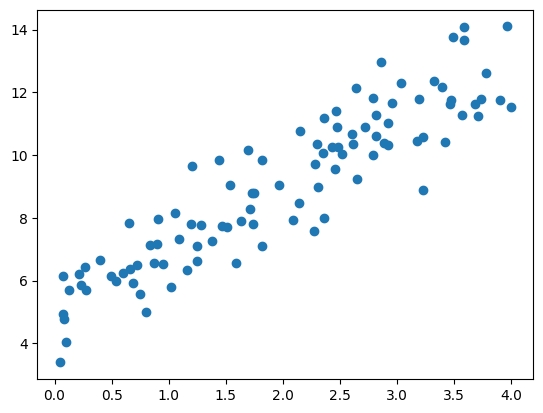

In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) # 시드값 고정

w0 = 5 # y절편
w1 = 2 # 회귀 계수
noise = np.random.randn(100, 1) # 노이즈

x = 4 * np.random.rand(100, 1) # 0 ~ 4 사이 실수값 100개 생성 (x값)
y = w1*x + w0 + noise # y값

plt.scatter(x, y)

- 모델 훈련

In [15]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(x,y)

print('y절편(w0):', linear_reg_model.intercept_)
print('회귀계수(w1):', linear_reg_model.coef_)

y절편(w0): [5.09772262]
회귀계수(w1): [[1.9808382]]


- 회귀선 확인

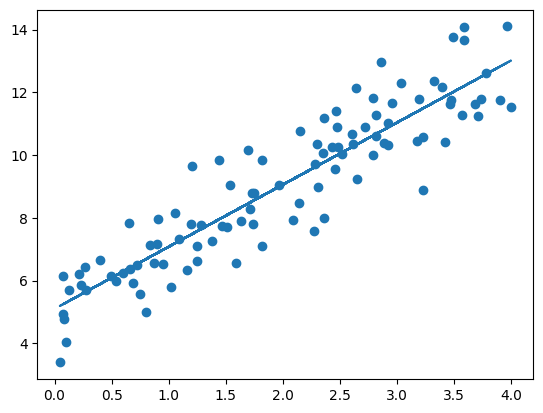

In [16]:
y_pred = linear_reg_model.predict(x) # 예측

plt.scatter(x, y)
plt.plot(x, y_pred); # 선형 회귀선 그리기

### 결정 트리(decision tree)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'], stratify=cancer_data['target'], test_size=0.4, random_state=42)

decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)

accuracy = decisiontree.score(X_test, y_test)

print(f'결정 트리 정확도: {accuracy:.3f}')

결정 트리 정확도: 0.930


### 랜덤 포레스트(random forest)

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data['data'], cancer_data['target'], stratify=cancer_data['target'], test_size=0.4, random_state=42)

randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)

accuracy = randomforest.score(X_test, y_test)

print(f'랜덤 포레스트 정확도: {accuracy:.3f}')

랜덤 포레스트 정확도: 0.939


### 베이지안 최적화

1. 하이퍼파라미터 탐색 범위 설정

In [21]:
param_bounds = {'x':(-1,5),
                'y':(0,4)}

2. 평가지표 계산 함수 정의

In [22]:
def eval_function(x, y):
    return -x**2-(y-2)**2+10

3. 베이지안 최적화 객체 생성

In [29]:
from bayes_opt import BayesianOptimization

optimizer = BayesianOptimization(f=eval_function,
                                 pbounds=param_bounds,
                                 random_state=0)

In [30]:
optimizer.maximize(init_points=2, n_iter=10)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
| 1         | 4.002     | 2.293     | 2.861     |
| 2         | 3.121     | 2.617     | 2.18      |
| 3         | 3.832     | 2.327     | 2.869     |
| 4         | 4.596     | 2.171     | 2.832     |
| 5         | -6.227    | 3.989     | 2.559     |
| 6         | 9.467     | 0.3522    | 1.361     |
| 7         | 7.39      | -1.0      | 3.269     |
| 8         | 5.0       | -1.0      | 0.0       |
| 9         | 3.841     | 1.469     | 0.0       |
| 10        | 8.966     | -1.0      | 1.817     |
| 11        | 9.737     | 0.1806    | 2.48      |
| 12        | 5.785     | 0.4638    | 4.0       |


In [31]:
optimizer.max

{'target': 9.737088721283714,
 'params': {'x': 0.18063644593964895, 'y': 2.47987681035301}}